In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Load the dataset
df = pd.read_csv('download.csv')

# Display the first few rows of the dataframe
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Convert 'season' and 'weathersit' to categorical string labels
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

# Check for missing values
df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)


In [5]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


In [6]:
# Define the feature variables (X) and the target variable (y)
X = df.drop(['cnt'], axis=1)
y = df['cnt']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)


In [8]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared score on the test set: {r2}')


R-squared score on the test set: 0.8291379087166059


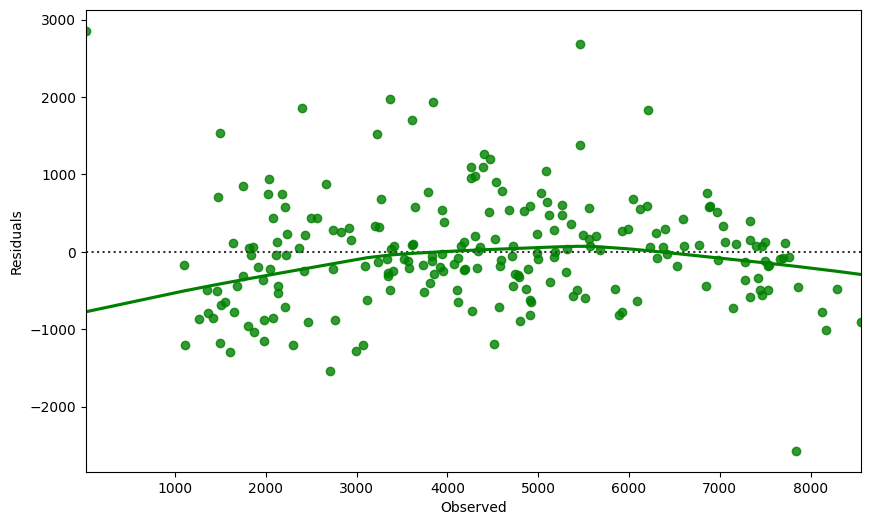

In [10]:
# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color="g")
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.show()


In [11]:
# Print the coefficients of the model
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                                                    Coefficient
yr                                                  1975.903385
mnth                                                 -34.478646
holiday                                             -473.741593
weekday                                               60.093255
workingday                                           140.502921
temp                                                  66.926271
atemp                                                 51.398500
hum                                                  -10.775988
windspeed                                            -35.938486
season_spring                                      -1096.654843
season_summer                                        183.215687
season_winter                                        801.200532
weathersit_Light Snow, Light Rain + Thunderstor... -1873.112699
weathersit_Mist + Cloudy, Mist + Broken clouds,...  -466.912027
